# Flight price prediction

## Steps to be followed
1. Data collection
2. Importing libraries
3. Importing datasets
4. Preprocessing
5. Identifying and handling missing values
6. Visualization
7. Encoding categorical features to numerical
8. Splitting the data
9. Scaling
10. Model building
11. Model prediction
12. model performance

## 1. Data was there with the problem statement

## 2. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re

## Importing datasets

In [2]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('C:/Users/Reddymr2022/Lasso_Regression/Week-6-Task/Flight_Prediction.zip') # having First.csv zipped file.
Flight_file1 = pd.read_csv(zf.open('flight prediction/business.csv'))
Flight_file2 = pd.read_csv(zf.open('flight prediction/economy.csv'))

In [3]:
print(Flight_file1.shape)
print(Flight_file2.shape)

(93487, 11)
(206774, 11)


### 4. Preprocessing

In [4]:
Flight_file1.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [5]:
Flight_file1.tail()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265"
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105"
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099"
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585"
93486,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"81,585"


In [6]:
Flight_file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [7]:
Flight_file1.isna().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [8]:
Flight_file2.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [9]:
Flight_file2.tail()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206773,31-03-2022,Vistara,UK,824,20:30,Chennai,24h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"8,640"


## 5. Identifying and handling missing values

In [10]:
Flight_file2.isna().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [11]:
#adding  the new feature named class
Flight_file1["class"] = "business"
Flight_file2["class"] = "economy"

In [12]:
df = pd.merge(Flight_file1,Flight_file2,how='outer',)

In [13]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business


In [14]:
df.tail()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
300256,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697",economy
300257,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709",economy
300258,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",economy
300259,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",economy
300260,31-03-2022,Vistara,UK,824,20:30,Chennai,24h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"8,640",economy


In [15]:
df.shape

(300261, 12)

In [16]:
#merging two columns (ch_code and "num_code") and making new feature flight
df.num_code = df.num_code.astype("str")
df["flight"] = df["ch_code"] +"-"+ df["num_code"]

In [17]:
df.drop(["ch_code","num_code"],axis = 1,inplace = True)

In [18]:
df.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight
0,11-02-2022,Air India,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business,AI-868
1,11-02-2022,Air India,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business,AI-624
2,11-02-2022,Air India,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business,AI-531
3,11-02-2022,Air India,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business,AI-839
4,11-02-2022,Air India,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business,AI-544


In [19]:
# renaming the featuers
df = df.rename({"dep_time": "departure_time", "from": "source_city", "time_taken": "duration",
            "stop": "stops", "arr_time": "arrival_time","to":"destination_city"}, 
           axis = 1)

In [20]:
dd = pd.DataFrame(df["date"].str.split("-",expand = True).to_numpy().astype(int),columns = ["day","month","year"])
df["days_left"] = np.where(dd["month"] > 2, dd["day"] +18, np.where(dd["month"] == 2, dd["day"] -10, dd["day"]))
df.head()

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,11-02-2022,Air India,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business,AI-868,1
1,11-02-2022,Air India,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business,AI-624,1
2,11-02-2022,Air India,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business,AI-531,1
3,11-02-2022,Air India,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business,AI-839,1
4,11-02-2022,Air India,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business,AI-544,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   date              300261 non-null  object
 1   airline           300261 non-null  object
 2   departure_time    300261 non-null  object
 3   source_city       300261 non-null  object
 4   duration          300261 non-null  object
 5   stops             300261 non-null  object
 6   arrival_time      300261 non-null  object
 7   destination_city  300261 non-null  object
 8   price             300261 non-null  object
 9   class             300261 non-null  object
 10  flight            300261 non-null  object
 11  days_left         300261 non-null  int32 
dtypes: int32(1), object(11)
memory usage: 28.6+ MB


In [22]:
df.drop("date",axis = 1,inplace = True)

In [23]:
# converting time into morning/noon/evening, etc
s = (pd.to_datetime(df["departure_time"]).dt.hour % 24 + 4) // 4
s.replace({1: 'Late Night', 2: 'Early Morning', 3: 'Morning', 4: 'Afternoon', 5: 'Evening', 6: 'Night'} ,inplace = True)
df["departure_time"] = s 
df.head()

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,Air India,Evening,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business,AI-868,1
1,Air India,Evening,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business,AI-624,1
2,Air India,Night,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business,AI-531,1
3,Air India,Night,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business,AI-839,1
4,Air India,Evening,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business,AI-544,1


In [24]:
# converting time into morning/noon/evening, etc
s = (pd.to_datetime(df["arrival_time"]).dt.hour % 24 + 4) // 4
s.replace({1: 'Late Night', 2: 'Early Morning', 3: 'Morning', 4: 'Afternoon', 5: 'Evening', 6: 'Night'} ,inplace = True)
df["arrival_time"] = s 
df.head()

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,Air India,Evening,Delhi,02h 00m,non-stop,Night,Mumbai,"25,612",business,AI-868,1
1,Air India,Evening,Delhi,02h 15m,non-stop,Night,Mumbai,"25,612",business,AI-624,1
2,Air India,Night,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Night,Mumbai,"42,220",business,AI-531,1
3,Air India,Night,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Night,Mumbai,"44,450",business,AI-839,1
4,Air India,Evening,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Night,Mumbai,"46,690",business,AI-544,1


In [25]:
# making duration in float values by calculating only hours
temp = pd.DataFrame(df["duration"].str.split(expand = True).to_numpy().astype(str), 
                    columns = ["hour","minute"])
temp["hour"] = temp["hour"].apply(lambda x: re.sub("[^0-9]","",x)).astype(int)
temp["minute"] = temp["minute"].apply(lambda r: re.sub("[^0-9]","",r)) # we have no values in minute colum some where 
temp["minute"] = np.where(temp["minute"] == "", 0, temp["minute"]) # replaceing "" with 0
temp["minute"] = temp["minute"].astype(int) #converting data type
df["duration"] = np.around((temp["hour"] + (temp["minute"]/60)),2) #savin the total hours in duration feature
df.head()

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,Air India,Evening,Delhi,2.00,non-stop,Night,Mumbai,"25,612",business,AI-868,1
1,Air India,Evening,Delhi,2.25,non-stop,Night,Mumbai,"25,612",business,AI-624,1
2,Air India,Night,Delhi,24.75,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Night,Mumbai,"42,220",business,AI-531,1
3,Air India,Night,Delhi,26.50,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Night,Mumbai,"44,450",business,AI-839,1
4,Air India,Evening,Delhi,6.67,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Night,Mumbai,"46,690",business,AI-544,1


In [26]:
# making the stops in numeric data type by giving stops accordingly
df["stops"] = df["stops"].apply(lambda r: re.sub("[^0-9]","",r))
# taking only digits
df["stops"] = np.where(df["stops"] == "", 0, df["stops"]) 
# replacing "" with 0
df["stops"] = df["stops"].astype(int) # changing object to int
df.head()

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,Air India,Evening,Delhi,2.00,0,Night,Mumbai,"25,612",business,AI-868,1
1,Air India,Evening,Delhi,2.25,0,Night,Mumbai,"25,612",business,AI-624,1
2,Air India,Night,Delhi,24.75,1,Night,Mumbai,"42,220",business,AI-531,1
3,Air India,Night,Delhi,26.50,1,Night,Mumbai,"44,450",business,AI-839,1
4,Air India,Evening,Delhi,6.67,1,Night,Mumbai,"46,690",business,AI-544,1


In [27]:
# removing noise from price column
df["price"] = df["price"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
df["price"] = df["price"].astype(int) # changing object to int
df.head()

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,Air India,Evening,Delhi,2.00,0,Night,Mumbai,25612,business,AI-868,1
1,Air India,Evening,Delhi,2.25,0,Night,Mumbai,25612,business,AI-624,1
2,Air India,Night,Delhi,24.75,1,Night,Mumbai,42220,business,AI-531,1
3,Air India,Night,Delhi,26.50,1,Night,Mumbai,44450,business,AI-839,1
4,Air India,Evening,Delhi,6.67,1,Night,Mumbai,46690,business,AI-544,1


In [28]:
# arranging the features 
df = df[["airline","flight","source_city","departure_time","stops",
     "arrival_time","destination_city","class","duration","days_left","price"]]

In [29]:
# exporting the file in csv
df.to_csv("Clean_flight_data.csv", index = False)

In [30]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Air India,AI-868,Delhi,Evening,0,Night,Mumbai,business,2.00,1,25612
1,Air India,AI-624,Delhi,Evening,0,Night,Mumbai,business,2.25,1,25612
2,Air India,AI-531,Delhi,Night,1,Night,Mumbai,business,24.75,1,42220
3,Air India,AI-839,Delhi,Night,1,Night,Mumbai,business,26.50,1,44450
4,Air India,AI-544,Delhi,Evening,1,Night,Mumbai,business,6.67,1,46690


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300261 non-null  object 
 1   flight            300261 non-null  object 
 2   source_city       300261 non-null  object 
 3   departure_time    300261 non-null  object 
 4   stops             300261 non-null  int32  
 5   arrival_time      300261 non-null  object 
 6   destination_city  300261 non-null  object 
 7   class             300261 non-null  object 
 8   duration          300261 non-null  float64
 9   days_left         300261 non-null  int32  
 10  price             300261 non-null  int32  
dtypes: float64(1), int32(3), object(7)
memory usage: 24.1+ MB


In [32]:
df.describe()

,stops,duration,days_left,price
count,300261.000000,300261.000000,300261.000000,300261.000000
mean,0.924213,12.219142,26.004473,20883.717666
std,0.398188,7.200348,13.560985,22695.911266
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.750000,15.000000,4783.000000
50%,1.000000,11.250000,26.000000,7425.000000
75%,1.000000,16.170000,38.000000,42521.000000
max,2.000000,103.000000,49.000000,123071.000000


<AxesSubplot:>

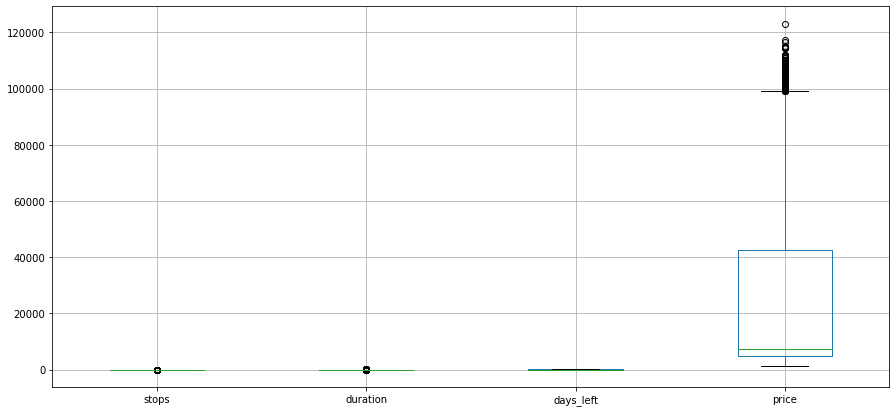

In [33]:
#boxplot to check the outliers
plt.figure(figsize = (15, 7)) 
df.boxplot() 

<AxesSubplot:xlabel='duration', ylabel='Density'>

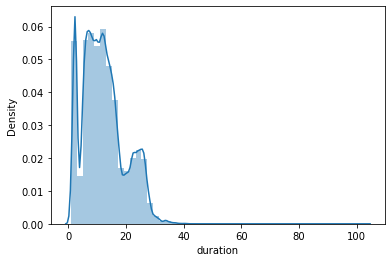

In [34]:
#Need to handle with outliers
sns.distplot(df['duration'])

#### Right sckewed

In [35]:
## calculating inter quantile range
Q3 = df.duration.quantile(0.75)
Q1 = df.duration.quantile(0.25)
IQR = Q3 - Q1
IQR

9.420000000000002

In [36]:
#Outlier 
lower_bridge = df['duration'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['duration'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-7.380000000000003
30.300000000000004


In [37]:
# filling outlier with fixed value
df.loc[df['duration']>=30, 'duration']=30

<AxesSubplot:xlabel='duration', ylabel='Density'>

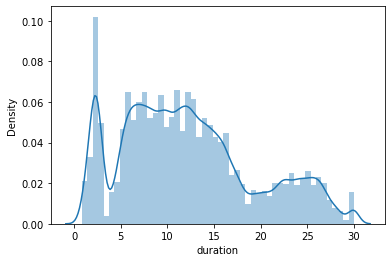

In [38]:
sns.distplot(df['duration'])

#### Guassian distribution

<AxesSubplot:xlabel='stops', ylabel='Density'>

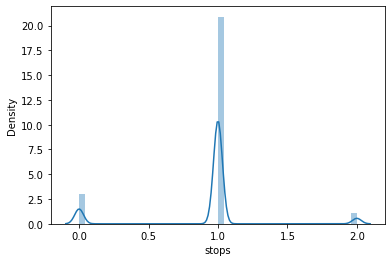

In [39]:
sns.distplot(df['stops'])

#### Normally distributed

<AxesSubplot:xlabel='days_left', ylabel='Density'>

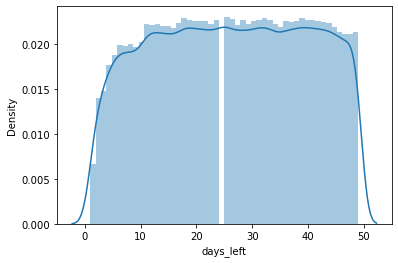

In [40]:
sns.distplot(df['days_left'])

#### Normally distributed

In [41]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Air India,AI-868,Delhi,Evening,0,Night,Mumbai,business,2.00,1,25612
1,Air India,AI-624,Delhi,Evening,0,Night,Mumbai,business,2.25,1,25612
2,Air India,AI-531,Delhi,Night,1,Night,Mumbai,business,24.75,1,42220
3,Air India,AI-839,Delhi,Night,1,Night,Mumbai,business,26.50,1,44450
4,Air India,AI-544,Delhi,Evening,1,Night,Mumbai,business,6.67,1,46690


## 6. Visualization

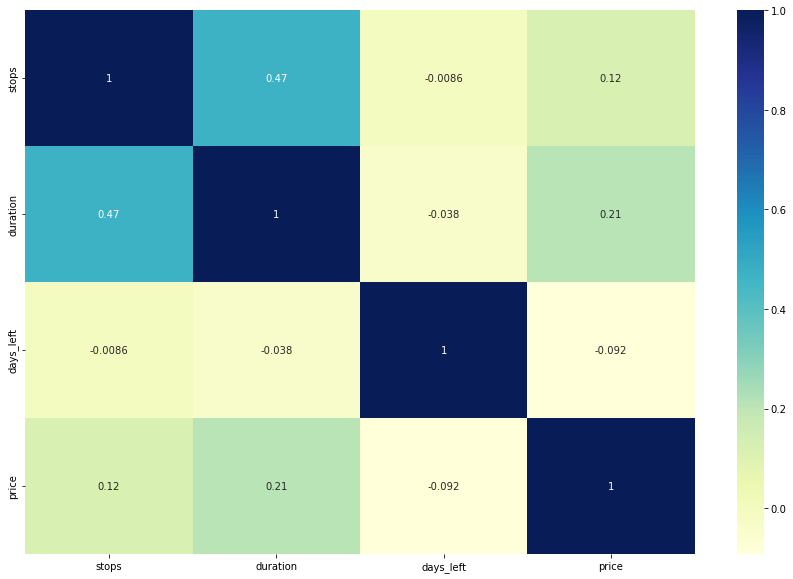

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Stops and Duration are correlated

### Univariate

Text(0, 0.5, 'dencity')

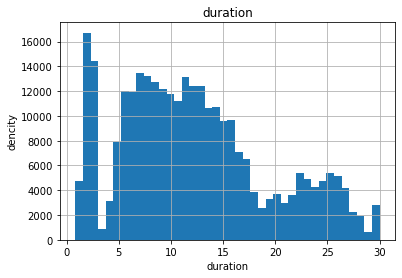

In [43]:
fig = df.duration.hist(bins=40)
fig.set_title('duration')
fig.set_xlabel('duration')
fig.set_ylabel('dencity')

#### Duration distributed properly

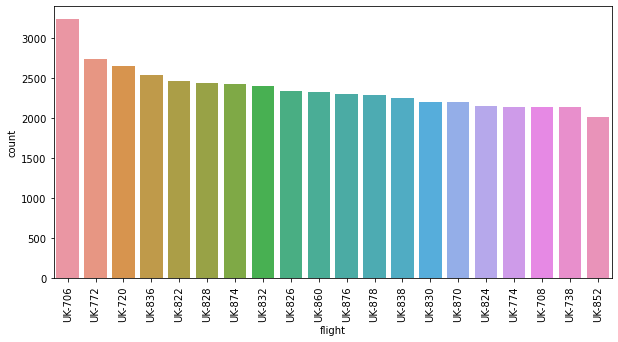

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='flight',data=df, ax = ax, order = df['flight'].value_counts().iloc[:20].index)

#### Flight uk706 has appeared many times
### We can drop this column

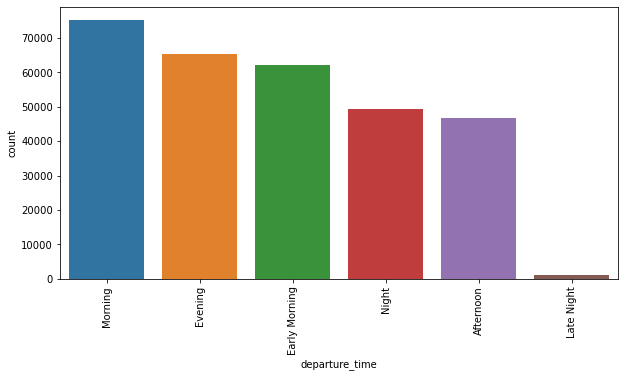

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='departure_time',data=df, ax = ax, order = df['departure_time'].value_counts().iloc[:10].index)

#### Morning time flights will fly more times

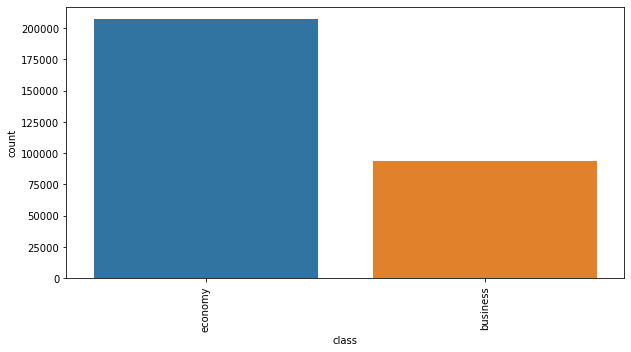

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='class',data=df, ax = ax, order = df['class'].value_counts().iloc[:10].index)

#### Many travellers booked Economy class

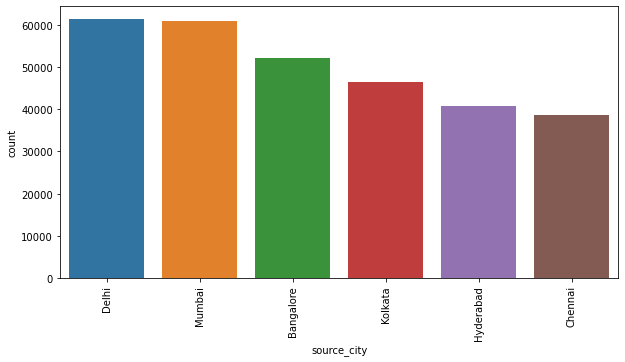

In [47]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='source_city',data=df, ax = ax, order = df['source_city'].value_counts().index)

#### From Delhi and Mumbai lot of flights were flied

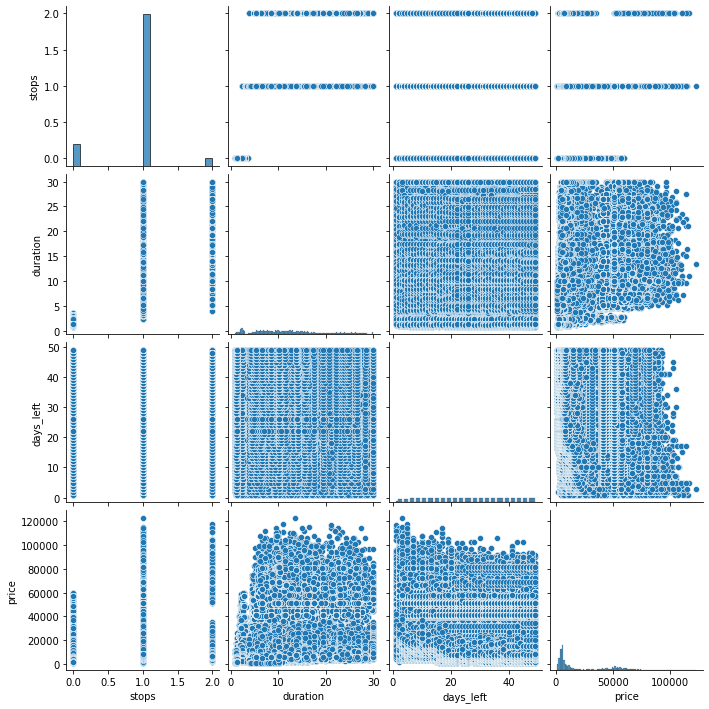

In [48]:
sns.pairplot(df)

#### Above pairplot shows the pair of variables relationship
#### Diagonal plots shows the distribution of itself

In [49]:
df = df.drop(['flight'],axis=1)

In [50]:
# dropping the duplicate rows
df.drop_duplicates(inplace = True)

In [51]:
df["departure_time"].replace({'Late Night':0,'Early Morning':1,'Morning':2,
                               'Afternoon':3,'Evening':4,'Night':5},inplace=True)
df["arrival_time"].replace({'Late Night':0,'Early Morning':1,'Morning':2,
                             'Afternoon':3,'Evening':4,'Night':5},inplace=True)
df["class"].replace({"economy":0,"business":1},inplace=True)
df.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Air India,Delhi,4,0,5,Mumbai,1,2.00,1,25612
1,Air India,Delhi,4,0,5,Mumbai,1,2.25,1,25612
2,Air India,Delhi,5,1,5,Mumbai,1,24.75,1,42220


## 7. Encoding categorical features to numerial

In [52]:
from sklearn.preprocessing import OneHotEncoder
# encoding for nominal data (we will use onehot encoder)
ohe = OneHotEncoder()
df[list(df["airline"].unique())] = ohe.fit_transform(df[["airline"]]).A 
# making sparse metrics to metrics
df = pd.concat([df,pd.get_dummies(df["destination_city"],prefix = "destination_city")], axis = 1)
df = pd.concat([df,pd.get_dummies(df["source_city"],prefix = "source_city")], axis = 1)
df.drop(["airline","source_city","destination_city"],axis = 1,inplace=True)
df.head(1)

,departure_time,stops,arrival_time,class,duration,days_left,price,Air India,Vistara,SpiceJet,...,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,4,0,5,1,2.0,1,25612,1.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0


In [53]:
# seperating the dependent and independent variables
X = df.drop(["price"], axis = 1)
y = df["price"]

## 8. Splitting the data

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 9. Scaling

In [55]:
##normalising the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [56]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 

## 10. Model building

In [57]:
from sklearn.linear_model import Lasso
sk_model = Lasso(alpha=10)

In [58]:
sk_model.fit(X_train, y_train)

Lasso(alpha=10)

In [59]:
sk_model.score(X_train, y_train)*100

90.9832656257544

In [60]:
y_pred = sk_model.predict(X_test)

In [61]:
from sklearn import metrics
print('Lasso')
print('r2_score', "{:.2f}".format(metrics.r2_score(y_test,y_pred)*100))
score = metrics.r2_score(y_test,y_pred)
a_r2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted_r2_score',"{:.2f}".format(a_r2*100))
print('MAE:', "{:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', "{:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Lasso
r2_score 91.02
Adjusted_r2_score 91.02
MAE: 4505.90
RMSE: 6810.89


# Without sklearn

In [62]:
import numpy as np

class LassoRegression:
    def __init__(self, alpha, max_iter=1000, tol=1e-4):
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X, y):
        m, n = X.shape
        theta = np.zeros(n)
        self.intercept_ = np.mean(y)
        X_centered = X - np.mean(X, axis=0)
        for iteration in range(self.max_iter):
            old_theta = theta.copy()
            for j in range(n):
                X_j = X_centered[:, j]
                y_pred = X_centered.dot(theta) + self.intercept_
                r = y - y_pred + theta[j] * X_j
                z = X_j.dot(X_j)
                if z == 0:
                    theta[j] = 0
                else:
                    theta[j] = np.sign(np.sum(X_j*r)) * max(0, np.abs(np.sum(X_j*r)) - self.alpha) / z
            self.intercept_ = np.mean(y - X_centered.dot(theta))
            if np.sum(np.abs(theta - old_theta)) < self.tol:
                break
        self.coef_ = theta
    
    def predict(self, X):
        return X.dot(self.coef_) + self.intercept_

In [63]:
# Fit the Lasso regression model
lasso = LassoRegression(alpha=1)
lasso.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso.predict(X_test)

In [64]:
import numpy as np

def r2_score(y_test, y_pred):
    sse = np.sum((y_test - y_pred) ** 2)
    sst = np.sum((y_test - np.mean(y_test)) ** 2)
    r2 = 1 - sse / sst
    return r2


In [65]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2*100)

R-squared: 91.01877599591482


In [66]:
import numpy as np

def mean_absolute_error(y_test, y_pred):
    mae = np.mean(np.abs(y_test - y_pred))
    return mae


In [67]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error:", mae)

Mean absolute error: 4512.964068928107


# Reddappa M R